# Data Mining Final Project : Music Miner

## Authors: 
Ruoyu (Michael) Zhang

Snigdha Potluri

Yifan (Frank) Zhou

In [1]:
# Package Installation
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,silhouette_score, accuracy_score, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import r2_score 
from pandas_profiling import ProfileReport
import time
from sklearn.naive_bayes import GaussianNB
from yellowbrick.features import RadViz
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.datasets import load_credit
from yellowbrick.datasets import load_hobbies
from sklearn.datasets import make_blobs
from yellowbrick.cluster import SilhouetteVisualizer
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
plt.style.use('seaborn-white')

# Contents
## Part 1. Introduction: Data and Problem summary

## Part 2. Answering First two quetions with dataset 1

2.1 Exploratory Data Analysis

2.2 Methodology 

2.3 Model Tuning and Validation

2.4 Key Takeaway From This Question

## Part 3. Answering another two quetions with dataset 2

3.1 Exploratory Data Analysis

3.2 Methodology 

3.3 Models for Question 3: Is there a better cluster way to capture the features of the music?

3.4 Model for Question 4：Are there any country-specific music preferences?

3.5 Key Takeaway From This Question

## Part 4: Conclusions and Discussions Addressing Questions

## Part 5: Future work

# Part 1. Introduction: Data and Problem summary

In this project, we challenge ourselves to predict whether a song will reach a spot in the Top 10 of the Billboard Hot 100 Chart. We aim to explore the mechanism of music recommendation and song ranking. With the three datasets from Kaggle, we are trying to build a rank predictor for a single song.

## Question Addressed:

Question 1: What songs can make it to the top 10 on the billboard?

Question 2: Which artists could create songs that reached the billboard?

Question 3: Is there a better cluster way to capture the features of the music?

Question 4：Are there any country-specific music preferences?

## Dataset Summary
### Dataset 1
This dataset includes the top songs by country by Spotify at Christmas 2019. In this dataset, we are going to explore 1) if preferences for music at Christmas time vary among countries 2) if their are better classification methods that capture the variance in music features rather than the current genres.

### url:
https://www.kaggle.com/leonardopena/top-50-spotify-songs-by-each-country

### Dataset 2
This dataset includes the top songs by country by spotify in 2019. This dataset has several variables about the songs and is based on Billboard. The extraction was done at Christmas time, so the most played songs should be related to Christmas. There are 13 attributes of these songs to be explored, including title, artist, top genre, time added, etc.

### url: 
https://www.kaggle.com/leonardopena/top-50-spotify-songs-by-each-country

### Decision to keeping both the datasets separate:

We want to keep the datasets sepatate. For this dataset, we have 7000 values, which includes all the songs which made it to the Top 10 of the Billboard Hot 100 Chart from 1990-2010 plus a sample of additional songs that didn't make the Top 10. From Dataset 1, we want to build a model that can predict whether the song can make it to the top 10 on the billboard or not. Possible solutions include classification and regression.

Dataset 2 mainly has Christmas Songs from different regions which we wanted to deal with separately. More regarding this explained in that notebook.


# Part 2. Answering First two quetions with dataset 1

## Question 1: What songs can make it to the top 10 on the billboard?

## Question 2: Which artists could create songs that reached the billboard?


## 2.1 Exploratory Data Analysis

In [2]:
# Reading and Cleaning the dataset.
Songs = pd.read_csv("songs.csv", encoding='latin-1') # Loading the chosen songs dataset

In [3]:
Songs.info() # Display feature types and data summary 
Songs.isnull().sum(axis=0) # Checking for null values in the dataset
print("Number of Missing Values: %1.0f"%Songs.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      7574 non-null   int64  
 1   songtitle                 7574 non-null   object 
 2   artistname                7574 non-null   object 
 3   songID                    7574 non-null   object 
 4   artistID                  7574 non-null   object 
 5   timesignature             7574 non-null   int64  
 6   timesignature_confidence  7574 non-null   float64
 7   loudness                  7574 non-null   float64
 8   tempo                     7574 non-null   float64
 9   tempo_confidence          7574 non-null   float64
 10  key                       7574 non-null   int64  
 11  key_confidence            7574 non-null   float64
 12  energy                    7574 non-null   float64
 13  pitch                     7574 non-null   float64
 14  timbre_0

#### We can notice that no null values were detected in this particular dataset.

In [4]:
Songs.shape
print("The number of rows are ",Songs.shape[0],"\n" "The number of columns are",Songs.shape[1])

The number of rows are  7574 
The number of columns are 39


#### Checking the Correlation between quantitive variables before dropping the columns

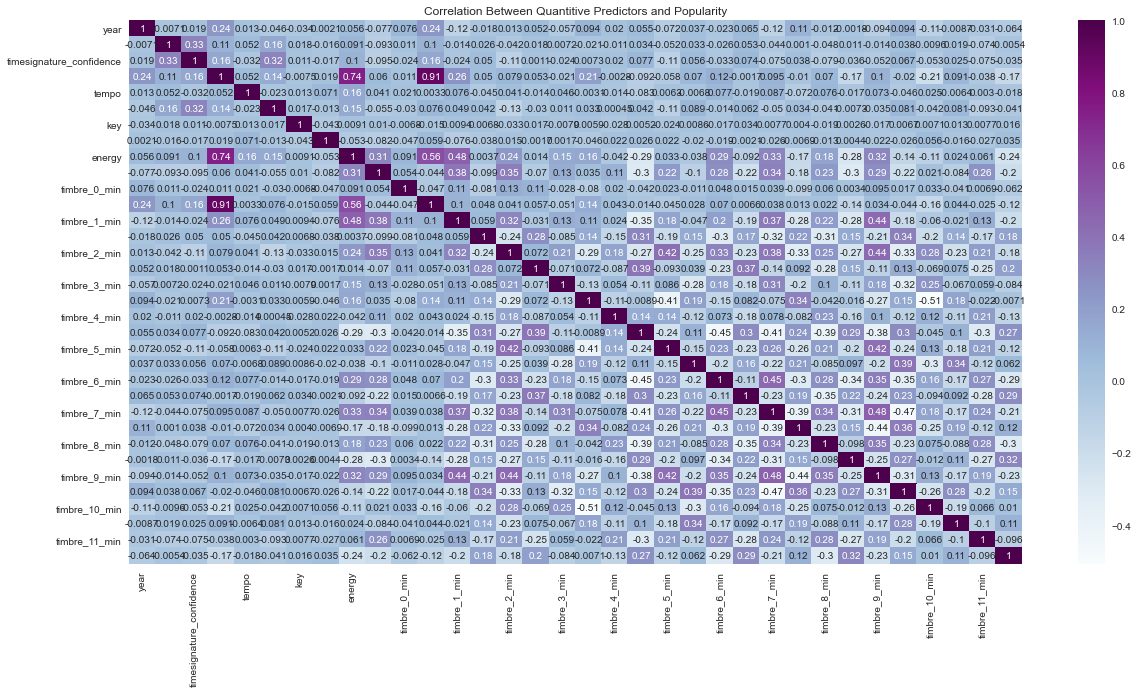

In [5]:
# Checking the Correlation between quantitive variables before dropping the columns
data_quant = Songs.drop(['songtitle', 'artistname','Top10', 'artistID','songID'], axis = 1)
fig, ax = plt.subplots()
sns.heatmap(data_quant.corr(), ax = ax,  annot = True, cmap="BuPu")
ax.set_title('Correlation Between Quantitive Predictors and Popularity')
fig.set_size_inches(20, 10)

#### Although there are many columns with repeatitive type of datapoint, we have decided to not to drop them yet. Only the timbre_0_min and timbre_0_max have high correlation, we decided to drop those columns for easier analysis.

In [6]:
Songs_Clean = Songs.drop(['timbre_0_min','timbre_0_max'], axis = 1)
#Dropped unnecessary columns.
Songs_Clean.head(5)
Songs_Clean.shape

(7574, 37)

In [7]:
Songs_Clean.columns

Index(['year', 'songtitle', 'artistname', 'songID', 'artistID',
       'timesignature', 'timesignature_confidence', 'loudness', 'tempo',
       'tempo_confidence', 'key', 'key_confidence', 'energy', 'pitch',
       'timbre_1_min', 'timbre_1_max', 'timbre_2_min', 'timbre_2_max',
       'timbre_3_min', 'timbre_3_max', 'timbre_4_min', 'timbre_4_max',
       'timbre_5_min', 'timbre_5_max', 'timbre_6_min', 'timbre_6_max',
       'timbre_7_min', 'timbre_7_max', 'timbre_8_min', 'timbre_8_max',
       'timbre_9_min', 'timbre_9_max', 'timbre_10_min', 'timbre_10_max',
       'timbre_11_min', 'timbre_11_max', 'Top10'],
      dtype='object')

### Since there are 4 columns with categorical data, it will be difficult to analyse the same. Hence we tried to encode these four columns into numerical values.

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
new_data = Songs_Clean.apply(le.fit_transform)
new_data.head(5)

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,20,6206,2,594,670,2,673,5186,2090,948,...,2402,5402,1517,6574,4298,861,65,4856,209,0
1,20,5514,2,5438,670,3,820,5304,6345,916,...,4905,3784,997,729,4643,1940,7017,5877,93,0
2,20,233,2,5251,670,3,820,5471,6823,485,...,2226,4105,2807,5497,2750,1672,1030,5071,197,0
3,20,3102,2,1715,670,3,820,5390,2847,789,...,3837,1164,1877,5116,6451,2015,2905,1542,1394,0
4,20,42,2,3430,670,3,608,4928,6347,283,...,5197,4684,1286,5194,3758,6477,190,3589,728,0


### Visualization to get insights into the data
Plots - Barplots, Boxplot and a heat map have been plotted.

#### Distribution for different variables

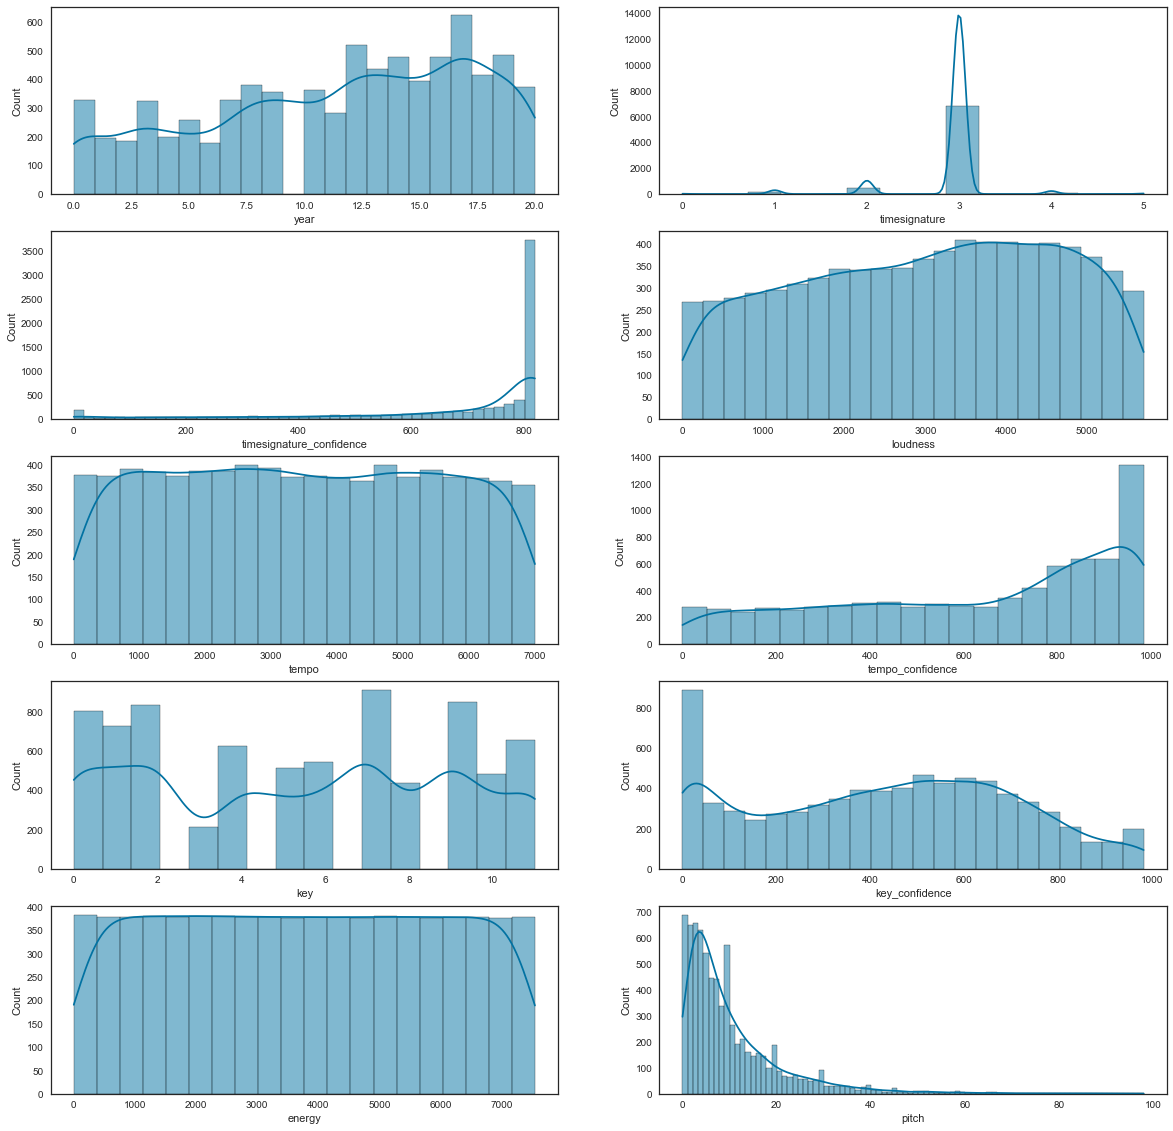

In [9]:
#1 Distribution for different variables
data_quant = new_data.drop(['songtitle', 'artistname','Top10', 'artistID','songID'], axis = 1)
fig, axes = plt.subplots(5,2, figsize = (20, 20))
for i in range(0,10):
    title = data_quant.columns.tolist()
    sns.histplot(data = data_quant.iloc[:,i], ax = axes[i//2, i%2], kde = True)

#### Correlation between quantitive variables

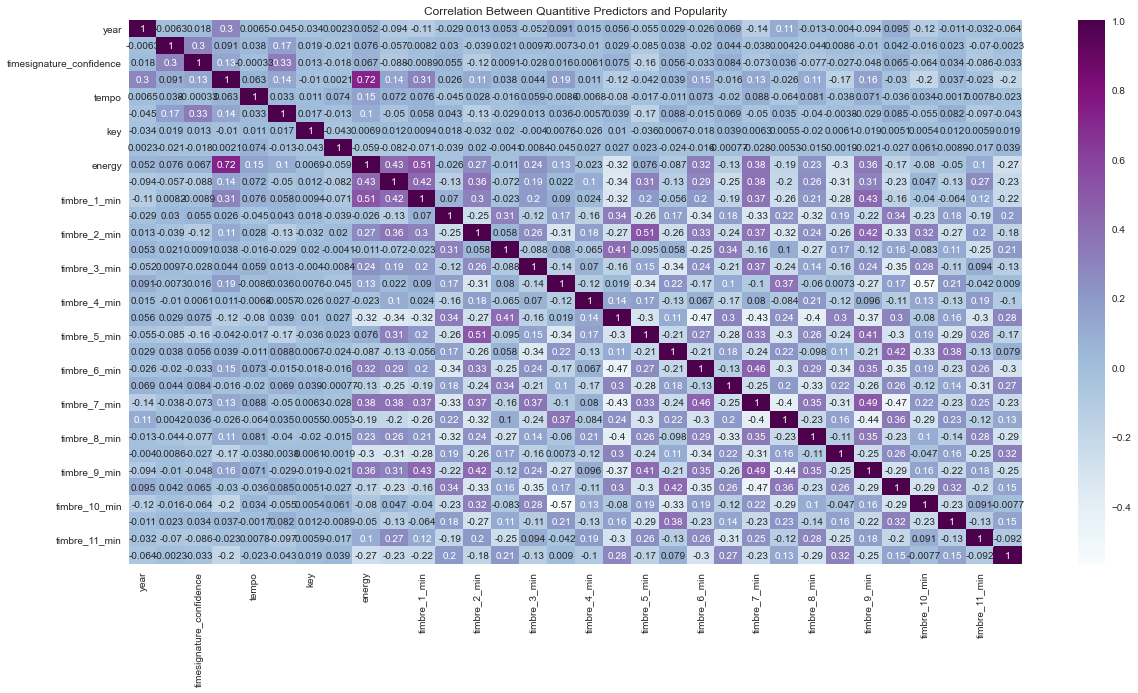

In [10]:
#2 Correlation between quantitive variables
data_quant = new_data.drop(['songtitle', 'artistname','Top10', 'artistID','songID'], axis = 1)
fig, ax = plt.subplots()
sns.heatmap(data_quant.corr(), ax = ax,  annot = True, cmap="BuPu")
ax.set_title('Correlation Between Quantitive Predictors and Popularity')
fig.set_size_inches(20, 10)

#### Predictors for different keys

Text(0.5, 1.0, 'Key vs Energy')

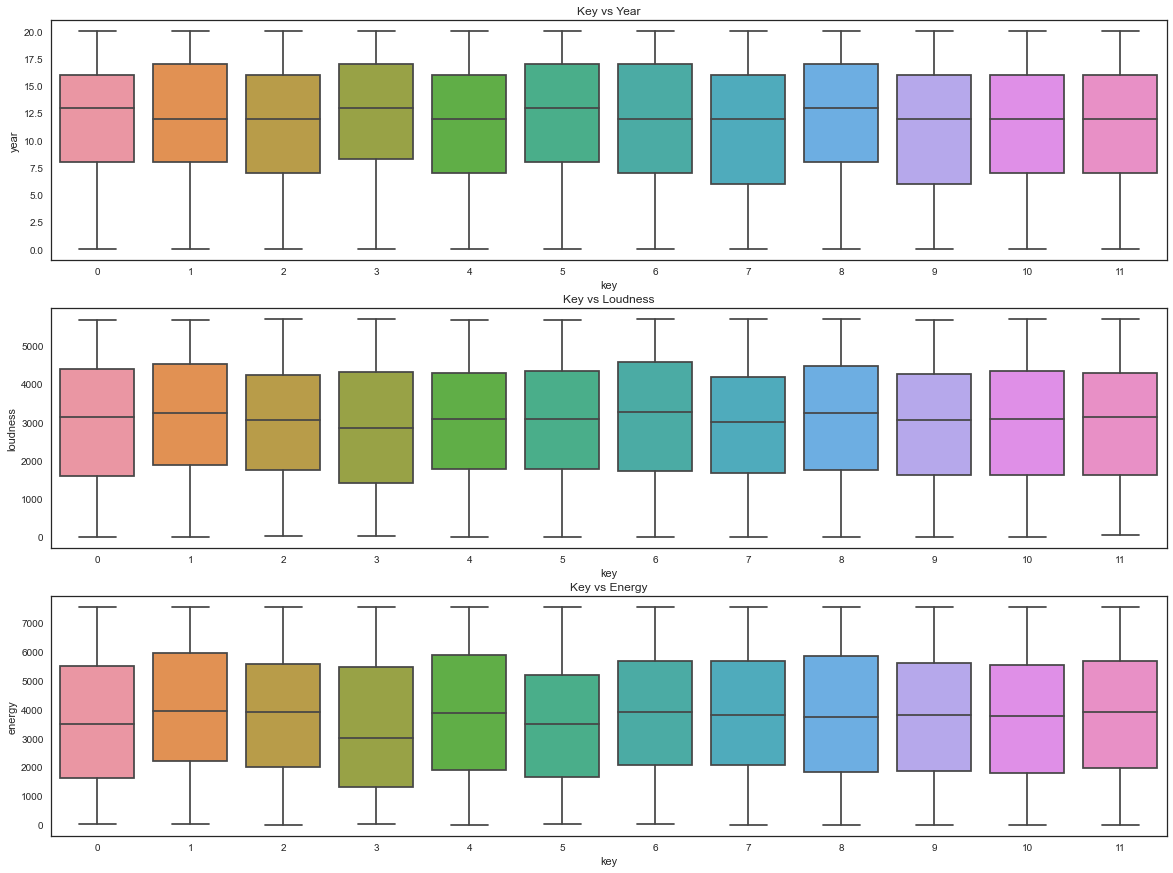

In [11]:
#3 Predictors for different keys
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,15))
sns.boxplot(ax = ax1, x = 'key', y = 'year', data = new_data)
ax1.set_title('Key vs Year')

sns.boxplot(ax = ax2, x = 'key', y = 'loudness', data = new_data)
ax2.set_title('Key vs Loudness')

sns.boxplot(ax = ax3, x = 'key', y = 'energy', data = new_data)
ax3.set_title('Key vs Energy')

### The above boxplots show us the variation of the 11 keys in all the songs with respect to other variables like Loudness and Energy, as well as with the change over the span of 20 years. These plots tell us that they have stayed pretty constant through out without major shifts.

#### Predictors for different timesignatures

Text(0.5, 1.0, 'Timesignature vs Energy')

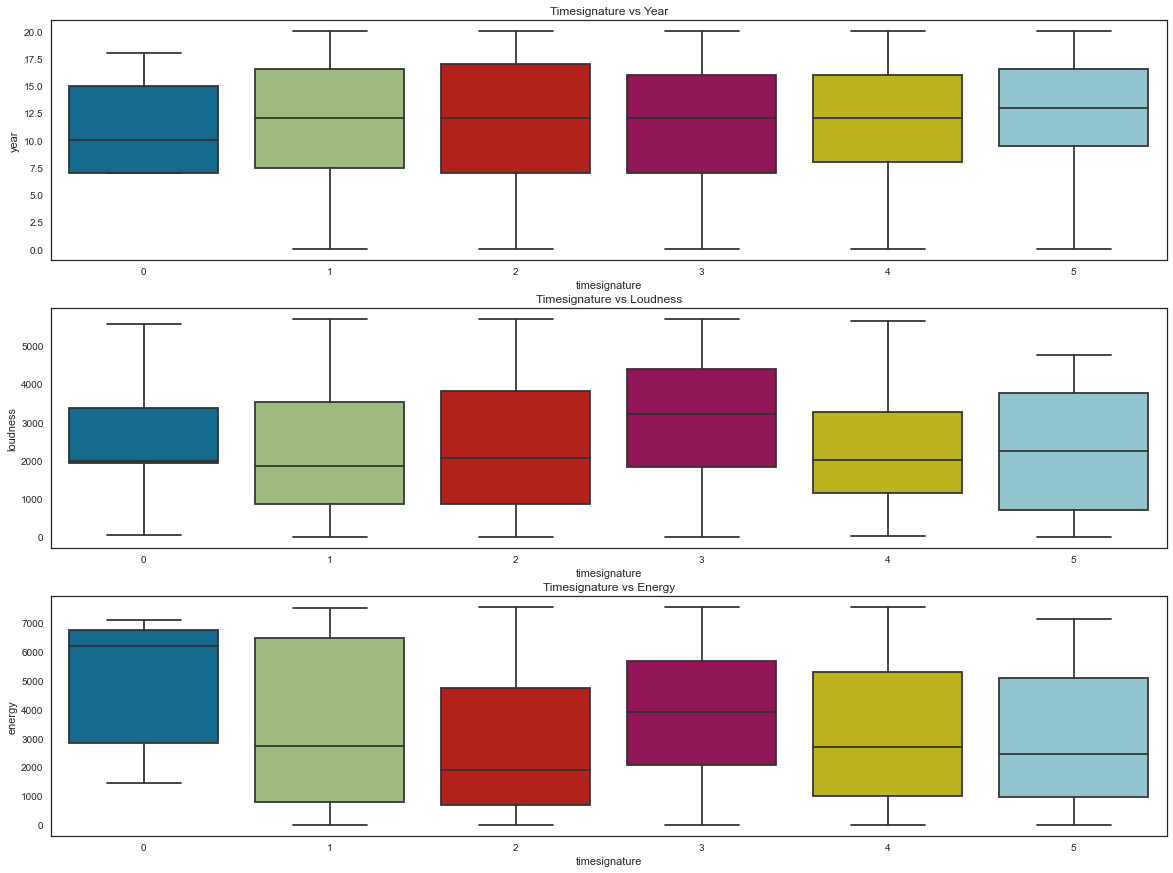

In [12]:
#4 Predictors for different timesignatures
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,15))
sns.boxplot(ax = ax1, x = 'timesignature', y = 'year', data = new_data)
ax1.set_title('Timesignature vs Year')

sns.boxplot(ax = ax2, x = 'timesignature', y = 'loudness', data = new_data)
ax2.set_title('Timesignature vs Loudness')

sns.boxplot(ax = ax3, x = 'timesignature', y = 'energy', data = new_data)
ax3.set_title('Timesignature vs Energy')

### These boxplots show us the trends of the time of songs with respect to variables over a span of 20 years. We can understand that with the change in loudness and energy, the time of the song changes quite a lot but over the years, the time has stayed pretty standard.

#### Analysis for the first 2 Questions

In [13]:
Top10_Songs = Songs.loc[Songs['Top10'] == 1]
Top10_Songs

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
9,2010,Whataya Want From Me,Adam Lambert,SOFOBLL13A9E22142F,ARIGTAO11FED0C4411,4,0.938,-15.557,95.904,0.929,...,99.150,-69.346,56.233,-94.733,62.789,-102.870,65.328,-48.411,47.376,1
23,2010,We Are The World 25: For Haiti,Artists For Haiti,SOTEGEI13134389BC0,ARZAYIQ1275322AEE7,4,1.000,-6.218,75.018,0.232,...,73.640,-66.116,70.950,-50.593,55.819,-108.325,51.494,-62.202,55.321,1
24,2010,Magic,B.o.B,SOCRJPX135FFE4F1AC,ARKQQZA12086C116FC,4,1.000,-4.281,82.543,0.948,...,86.738,-66.377,45.026,-51.316,76.215,-74.426,64.825,-60.809,45.137,1
25,2010,Airplanes,B.o.B,SOVWJTF13B346C89A9,ARKQQZA12086C116FC,4,1.000,-4.632,93.041,0.943,...,109.932,-58.905,41.963,-49.356,71.626,-110.716,50.365,-44.384,29.936,1
26,2010,Nothin' On You,B.o.B,SOWHVEZ13672C4B6A4,ARKQQZA12086C116FC,4,1.000,-4.310,104.015,1.000,...,80.755,-60.000,47.343,-68.064,55.142,-97.047,50.844,-51.398,43.509,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7535,1990,The Way You Do The Things You Do,UB40,SOBYHAX1311AFDCA86,AR1WWVL1187B9B0306,4,1.000,-9.914,80.865,0.941,...,59.647,-45.392,78.779,-48.077,60.752,-71.797,38.005,-43.463,38.201,1
7536,1990,Ice Ice Baby,Vanilla Ice,SOJFSMW13741A466BA,ARQUN9K1187B9B5BD7,4,0.326,-9.894,115.478,0.571,...,149.028,-64.857,71.936,-96.373,87.181,-90.330,45.489,-71.101,42.939,1
7543,1990,Cherry Pie,Warrant,SOCHOMY13743D265F0,AR261YW1187FB374B3,4,0.712,-4.324,88.066,0.288,...,134.903,-82.790,53.873,-49.426,97.366,-194.978,136.589,-49.064,42.615,1
7544,1990,Release Me,Wilson Phillips,SOQNRIS13167715B05,ARY2W5X1187FB3CB7A,4,1.000,-11.634,97.217,0.914,...,116.012,-64.832,53.894,-55.841,69.711,-97.623,58.941,-52.319,65.427,1


In [14]:
Most_Songs = Songs["artistname"]
max_value = Most_Songs.max()
print("The singer with most number of songs in the database: ",max_value)

Best_Singer = Top10_Songs["artistname"]
Best = Best_Singer.max()
print("The singer with most number Top10 of songs: ",Best)

The singer with most number of songs in the database:  will.i.am
The singer with most number Top10 of songs:  matchbox twenty


## 2.2 Methodology 

## Classification 

The classification/prediction variable would be the Top10 coulmn, which defines whether the song falls under the top 10 category on the Billboard or not. This is listed as a binary value and hence was chosen as the prediction variable.


### Pre-liminary tests
#### KNN Classification 

[[1878   91]
 [ 255   49]]
              precision    recall  f1-score   support

           0      0.880     0.954     0.916      1969
           1      0.350     0.161     0.221       304

    accuracy                          0.848      2273
   macro avg      0.615     0.557     0.568      2273
weighted avg      0.810     0.848     0.823      2273

Accuracy Score:  0.847778266608007


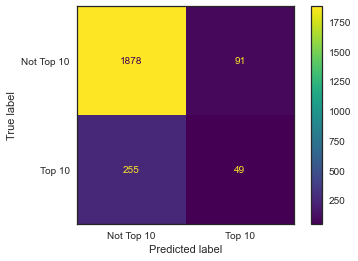

In [15]:
# Copy all the predictor variables into X dataframe
X = new_data.drop("Top10", axis=1)

# Copy target into the y dataframe. 
y = new_data[["Top10"]]

#Splitting the data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

#Creating an object of KNN classifier class
knn_songs = KNeighborsClassifier()

#Fitting a model for our training dataset
knn_songs.fit(X_train, y_train)

#Predictions based on the fitted model
y_pred = knn_songs.predict(X_test)

#Accuracy score of given model
scores = metrics.accuracy_score(y_test,y_pred)

#Confusion matrix for the KNN model
cm_songs = confusion_matrix(y_test,y_pred)
display_cm_songs= ConfusionMatrixDisplay(confusion_matrix=cm_songs, display_labels=['Not Top 10','Top 10'])
                                       
display_cm_songs.plot()
#Printing the desired results
print(cm_songs)
print(classification_report(y_test, y_pred, digits=3))
print("Accuracy Score: ",scores)

### We've trained the model with KNN Classifier as my priliminary test and the accuracy score seems to be pretty good with 84.8% accuracy.

#### Naive Bayes Classification

In [16]:
from sklearn.naive_bayes import GaussianNB

              precision    recall  f1-score   support

           0      0.929     0.728     0.816      1969
           1      0.266     0.638     0.376       304

    accuracy                          0.716      2273
   macro avg      0.597     0.683     0.596      2273
weighted avg      0.840     0.716     0.757      2273

Accuracy Score:  0.7162340519137703


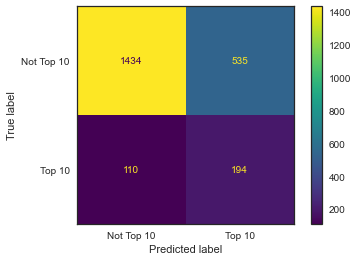

In [17]:
modelNB = GaussianNB()
modelNB.fit(X_train, y_train)
y_pred = modelNB.predict(X_test)

cm_songs = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred, digits=3))

scores_NB = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score: ",scores_NB)

dissplay_cm_songs = ConfusionMatrixDisplay(confusion_matrix=cm_songs,display_labels=['Not Top 10','Top 10'])
dissplay_cm_songs.plot()

#### Interpretation based on preliminary tests:

--> Comparing both the models, it is clear that the KNN model is performing better than the Naive Bayes model. Since we have classfied using only Top 10 Score, this is not a multiple class dataset, Naive Bayes classification is not performing better compared to K-nearest neighbors.

--> The reason for KNN is working well can be that the data per class is spread evenly across the feature space and thus it is easy to fit classifier based on nearest neighbor majority voting.

--> It can be noticed that it is hard to predict Not Top 10 songs as compared to Top 10 values.

--> The model classification is good since an 84% is very goood value but it can be noticed that the precision values are not top-notch for the Top 10 values predicted. This is due to the imbalance in the data. We plan on building better models to try and classify the imbalanced data further.



# 2.3 Model Tuning and Validation

### 2.3.1. Logistic Regression Classifier Model 

In [18]:
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
RANDOM_STATE = 42
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

# Create a pipeline
pipeline = make_pipeline(
    NearMiss(version=2), StandardScaler(), LogisticRegression(random_state=RANDOM_STATE)
)
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

Training target statistics: Counter({'Top10': 1})
Testing target statistics: Counter({'Top10': 1})
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.72      0.70      0.81      0.71      0.51      1969
          1       0.28      0.70      0.72      0.40      0.71      0.51       304

avg / total       0.85      0.72      0.71      0.76      0.71      0.51      2273



In [19]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
scoring = ["accuracy", "balanced_accuracy"]
cv_result = cross_validate(dummy_clf,  X_train, y_train, scoring=scoring)
print(f"Accuracy score of a dummy classifier: {cv_result['test_accuracy'].mean():.3f}")

Accuracy score of a dummy classifier: 0.846


In [20]:
print(
    f"Balanced accuracy score of a dummy classifier: "
    f"{cv_result['test_balanced_accuracy'].mean():.3f}"
)

Balanced accuracy score of a dummy classifier: 0.500


In [21]:
index = []
scores = {"Accuracy": [], "Balanced accuracy": []}
index += ["Dummy classifier"]
cv_result = cross_validate(dummy_clf, X_train, y_train, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Dummy classifier,0.846255,0.5


### Approach Methodology

Before training a the model, we stored the results obtained with our Dummy Classifier. 

We then created a pipeline using a LogisticRegression classifier using one-hot encoding of the categorical columns and standardized the numerical columns before pushing the data into the LogisticRegression classifier. We defined the categorical and numerical pipelines and created a preprocessor which will dispatch the categorical columns to the categorical pipeline and the numerical columns to the numerical pipeline.

Finally connected the preprocessor with our LogisticRegression classifier and then evaluated the model.

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

num_pipe = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore"),
)

In [23]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector

preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)

In [24]:
from sklearn.linear_model import LogisticRegression

lr_clf = make_pipeline(preprocessor_linear, LogisticRegression(max_iter=1000))

### LogisticRegression Classifier

In [25]:
index += ["Logistic regression"]
cv_result = cross_validate(lr_clf, X_train, y_train, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Dummy classifier,0.846255,0.500000
Logistic regression,0.851727,0.564984


[[1920   49]
 [ 250   54]]
              precision    recall  f1-score   support

           0      0.885     0.975     0.928      1969
           1      0.524     0.178     0.265       304

    accuracy                          0.868      2273
   macro avg      0.705     0.576     0.597      2273
weighted avg      0.837     0.868     0.839      2273



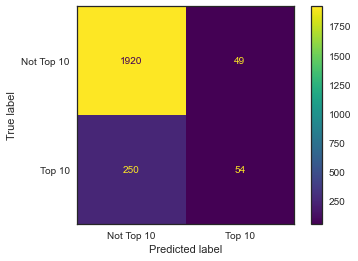

In [26]:
### Fitting a model for our training dataset
lr_clf.fit(X_train, y_train)

#Predictions based on the fitted model
y_pred = lr_clf.predict(X_test)

#Confusion matrix for the Logistic regression classifier
lr_songs = confusion_matrix(y_test,y_pred)
display_lr_songs= ConfusionMatrixDisplay(confusion_matrix=lr_songs, display_labels=['Not Top 10','Top 10'])
                                       
display_lr_songs.plot()
#Printing the desired results
print(lr_songs)
print(classification_report(y_test, y_pred, digits=3))

### Quite a bit of difference can be noticed with respect to precision with our LR model.

### 2.3.2 RandomForest Classifier

In [27]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

num_pipe = SimpleImputer(strategy="mean", add_indicator=True)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
)

preprocessor_tree = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)

rf_clf = make_pipeline(
    preprocessor_tree, RandomForestClassifier(random_state=42, n_jobs=2)
)

In [28]:
index += ["Random forest"]
cv_result = cross_validate(rf_clf, X_train, y_train, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Dummy classifier,0.846255,0.500000
Logistic regression,0.851727,0.564984
Random forest,0.852480,0.531290


[[1958   11]
 [ 281   23]]
              precision    recall  f1-score   support

           0      0.874     0.994     0.931      1969
           1      0.676     0.076     0.136       304

    accuracy                          0.872      2273
   macro avg      0.775     0.535     0.533      2273
weighted avg      0.848     0.872     0.824      2273



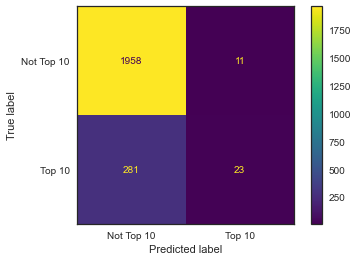

In [29]:
#Fitting a model for our training dataset
rf_clf.fit(X_train, y_train)

#Predictions based on the fitted model
y_pred = rf_clf.predict(X_test)

#Confusion matrix for the Random forest classifier
rf_songs = confusion_matrix(y_test,y_pred)
display_rf_songs= ConfusionMatrixDisplay(confusion_matrix=rf_songs, display_labels=['Not Top 10','Top 10'])
                                       
display_rf_songs.plot()
#Printing the desired results
print(rf_songs)
print(classification_report(y_test, y_pred, digits=3))

### The RandomForestClassifier is affected by the imbalanced classes as well, but slightly less than the linear model. Now, we will present different approach to try to improve the performance of these 2 models.

Most of the models in scikit-learn have a parameter class_weight. This parameter will affect the computation of the loss in linear model or the criterion in the tree-based model to penalize differently a false classification from the minority and majority class. We have set class_weight="balanced" such that the weight applied is inversely proportional to the class frequency. We test this parametrization in both linear model and tree-based model.



### 2.3.3.Model Tuning with balanced Class Weights

In [30]:
lrw = lr_clf.set_params(logisticregression__class_weight="balanced")

index += ["Logistic regression with balanced class weights"]
cv_result = cross_validate(lrw, X_train, y_train, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Dummy classifier,0.846255,0.500000
Logistic regression,0.851727,0.564984
Random forest,0.852480,0.531290
Logistic regression with balanced class weights,0.697794,0.710496


[[1359  610]
 [  73  231]]
              precision    recall  f1-score   support

           0      0.949     0.690     0.799      1969
           1      0.275     0.760     0.403       304

    accuracy                          0.700      2273
   macro avg      0.612     0.725     0.601      2273
weighted avg      0.859     0.700     0.746      2273



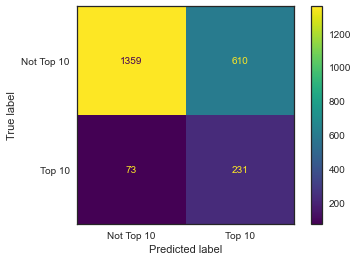

In [31]:
#Fitting a model for our training dataset
lrw.fit(X_train, y_train)

#Predictions based on the fitted model
y_pred = lrw.predict(X_test)

#Confusion matrix for the Logistic regression with balanced class weights classifier
lrw_songs = confusion_matrix(y_test,y_pred)
display_lrw_songs= ConfusionMatrixDisplay(confusion_matrix=lrw_songs, display_labels=['Not Top 10','Top 10'])
                                       
display_lrw_songs.plot()
#Printing the desired results
print(lrw_songs)
print(classification_report(y_test, y_pred, digits=3))

In [32]:
rfw = rf_clf.set_params(randomforestclassifier__class_weight="balanced")

index += ["Random forest with balanced class weights"]
cv_result = cross_validate(rfw, X_train, y_train, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Dummy classifier,0.846255,0.500000
Logistic regression,0.851727,0.564984
Random forest,0.852480,0.531290
Logistic regression with balanced class weights,0.697794,0.710496
Random forest with balanced class weights,0.848331,0.519802


[[1960    9]
 [ 290   14]]
              precision    recall  f1-score   support

           0      0.871     0.995     0.929      1969
           1      0.609     0.046     0.086       304

    accuracy                          0.868      2273
   macro avg      0.740     0.521     0.507      2273
weighted avg      0.836     0.868     0.816      2273



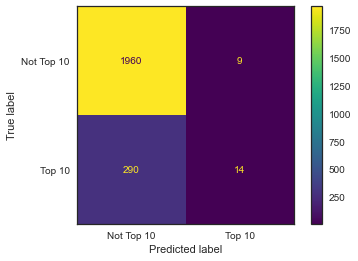

In [33]:
#Fitting a model for our training dataset
rfw.fit(X_train, y_train)

#Predictions based on the fitted model
y_pred = rfw.predict(X_test)

#Confusion matrix for the Random forest with balanced class weights classifier
rfw_songs = confusion_matrix(y_test,y_pred)
display_rfw_songs= ConfusionMatrixDisplay(confusion_matrix=rfw_songs, display_labels=['Not Top 10','Top 10'])
                                       
display_rfw_songs.plot()
#Printing the desired results
print(rfw_songs)
print(classification_report(y_test, y_pred, digits=3))

### We can see that using class_weight was really effective for the RandomForestClassifier, alleviating the issue of learning from imbalanced classes. However, the linear model is still biased toward the majority class, mainly due to the criterion which is not suited enough to fight the class imbalance.

## Of all the various models, Random Forest with balanced class weights classifier seems to be the best with 87.2% accuracy and good precision rate. 

## 2.4 Key Takeaway From This Question

### From the above results, it can be concluded that 1119 songs hit the Billboard Top10 Songs over a period of 20 years. 

### Of all the songs, the singer with the most number of songs in this dataset is: will.i.am

### The singer with most number of songs that made it to the Top10 is Matchbox Twenty

# Part 3. Answering another two quetions with dataset 2

## Question 3: Is there a better cluster way to capture the features of the music?

## Question 4：Are there any country-specific music preferences?


## 3.1 Exploratory Data Analysis

### Variable description
title: Song's title    
artist: Song's artist  
top genre: The genre of the track  
year: Song's year	
bpm: Beats.Per.Minute - The tempo of the song	
nrgy: Energy- The energy of a song - the higher the value, the more energtic.	
dnce: Danceability - The higher the value, the easier it is to dance to this song.	
dB: Loudness..dB.. - The higher the value, the louder the song	
live: Liveness - The higher the value, the more likely the song is a live recording	
val: Valence - The higher the value, the more positive mood for the song.	
dur: Length - The duration of the song.	
acous: Acousticness.. - The higher the value the more acoustic the song is.  
spch: Speechiness - The higher the value the more spoken word the song contains.	
pop: Popularity- The higher the value the more popular the song is.	
country: Country where the song was famous

In [34]:
#Data Cleaning
df = pd.read_csv('top50contry.csv',index_col= 0,encoding = 'iso-8859-1')
data = df.dropna() #Drop Column with null
data = data.drop('added', axis = 1) #Column 'added' has only one distinct value. 
data.reset_index(drop= True, inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      984 non-null    object 
 1   artist     984 non-null    object 
 2   top genre  984 non-null    object 
 3   year       984 non-null    int64  
 4   bpm        984 non-null    float64
 5   nrgy       984 non-null    float64
 6   dnce       984 non-null    float64
 7   dB         984 non-null    float64
 8   live       984 non-null    float64
 9   val        984 non-null    float64
 10  dur        984 non-null    int64  
 11  acous      984 non-null    float64
 12  spch       984 non-null    float64
 13  pop        984 non-null    int64  
 14  country    984 non-null    object 
dtypes: float64(8), int64(3), object(4)
memory usage: 115.4+ KB


In [35]:
data.head(5)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,country
0,Dance Monkey,Tones and I,australian pop,2019,98.0,59.0,82.0,-6.0,15.0,51.0,209,69.0,9.0,100,world
1,ROXANNE,Arizona Zervas,pop rap,2019,117.0,60.0,62.0,-6.0,46.0,46.0,164,5.0,15.0,99,world
2,Memories,Maroon 5,pop,2019,91.0,32.0,76.0,-7.0,8.0,57.0,189,84.0,5.0,99,world
3,Circles,Post Malone,dfw rap,2019,120.0,76.0,70.0,-3.0,9.0,55.0,215,19.0,4.0,99,world
4,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,150.0,63.0,34.0,-7.0,7.0,35.0,241,16.0,4.0,98,world


In [36]:
print('There are',len(data['country'].unique()),'countries in the dataset. We will get generate several regions.')
data['country'].unique()

There are 20 countries in the dataset. We will get generate several regions.


array(['world', 'africa', 'argentina', 'australia', 'belgium', 'bolivia',
       'brazil', 'canada', 'germany', 'colombia', 'chile', 'spain', 'usa',
       'france', 'india', 'indonesia', 'israel', 'italy', 'japan',
       'malasya'], dtype=object)

### Distribution for different variables

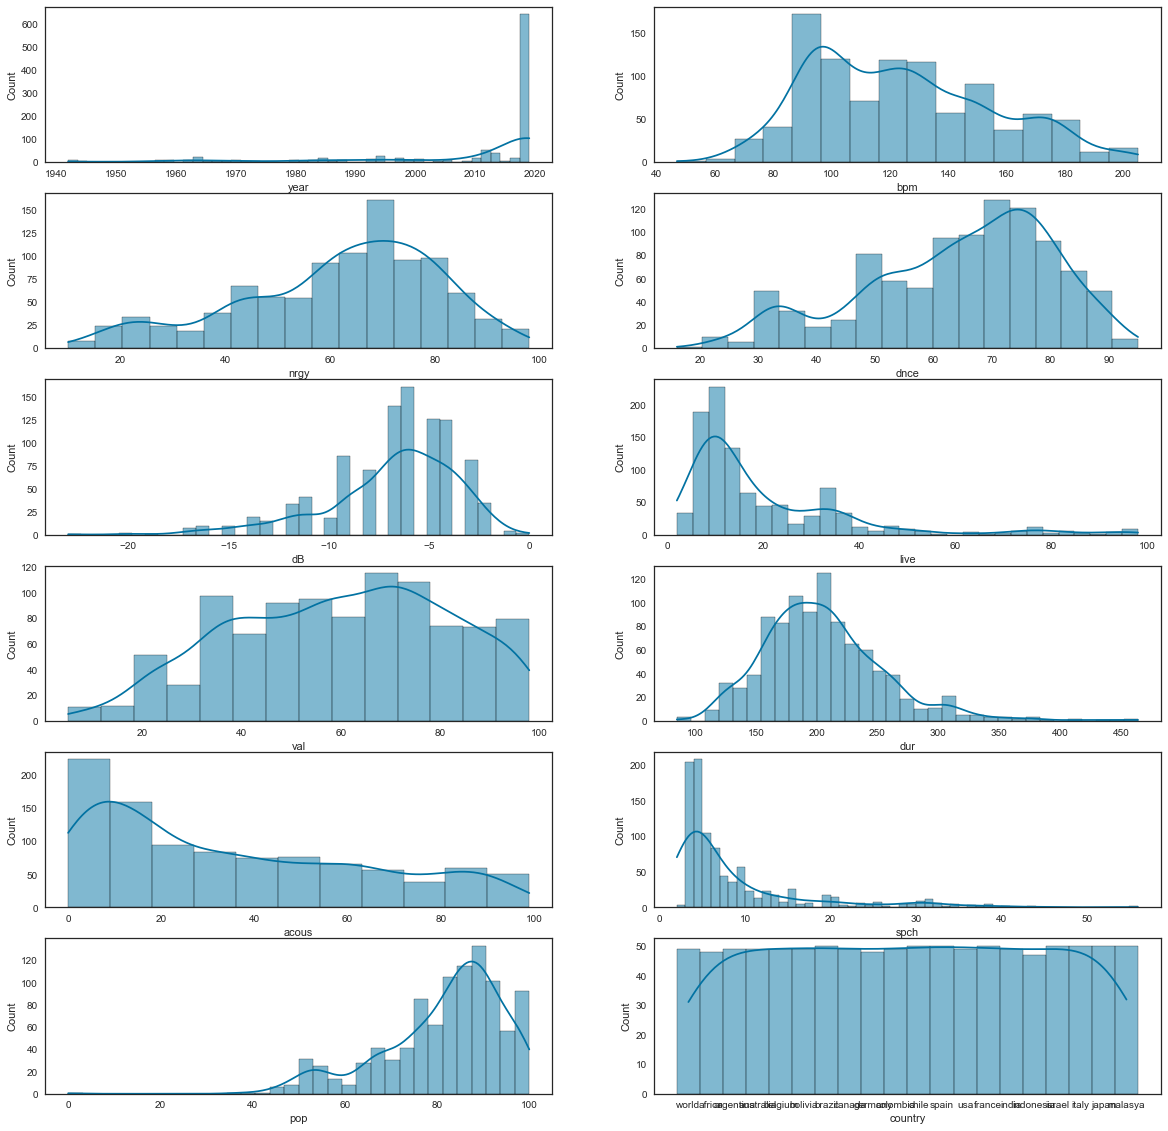

In [37]:
#1 Distribution for different variables
data_quant = data.drop(['title', 'artist','top genre'], axis = 1)
#print(data_quant.head())
fig, axes = plt.subplots(6,2, figsize = (20, 20))
for i in range(0,12):
    title = data_quant.columns.tolist()
    sns.histplot(data = data_quant.iloc[:,i], ax = axes[i//2, i%2], kde = True)

### Correlation between quantitive variables

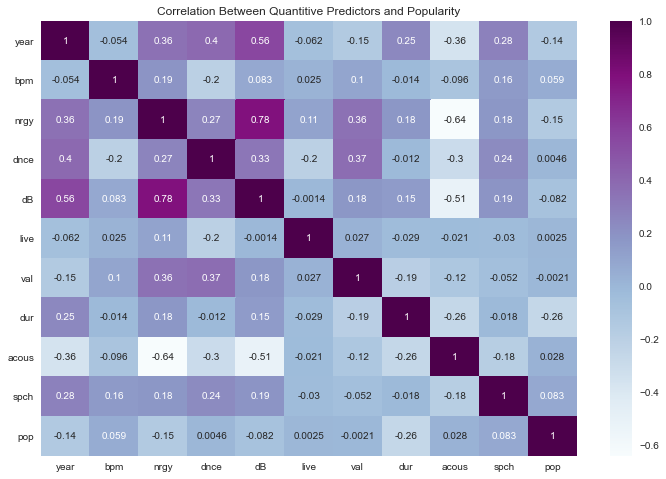

In [38]:
#2 Correlation between quantitive variables
data_quant = data.drop(['title', 'artist','top genre', 'country'], axis = 1)
fig, ax = plt.subplots()
sns.heatmap(data_quant.corr(), ax = ax,  annot = True, cmap="BuPu")
ax.set_title('Correlation Between Quantitive Predictors and Popularity')
fig.set_size_inches(12, 8)

### Predictors for different countries

Text(0.5, 1.0, 'BPM in different countries')

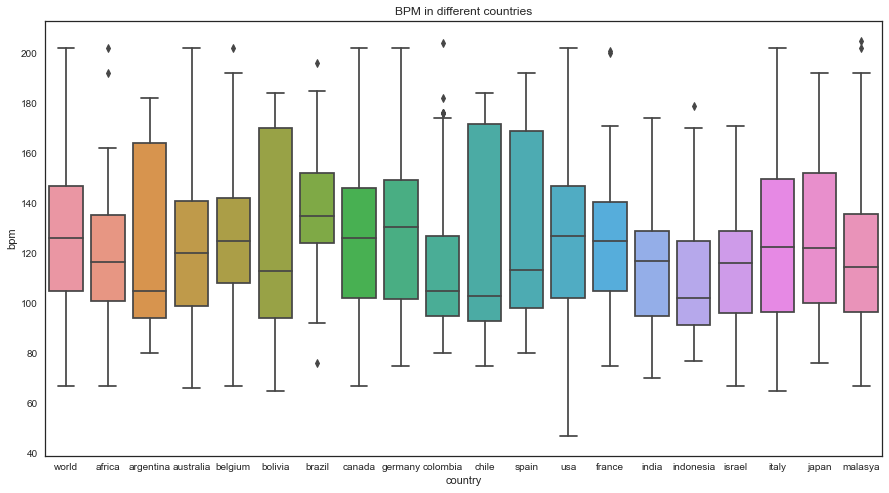

In [39]:
#3 Predictors for different countries
fig, ax1 = plt.subplots(figsize = (15,8))
#fig, (ax1,ax2) = plt.subplots(figsize = (20,15))
sns.boxplot(ax = ax1, x = 'country', y = 'bpm', data = data)
ax1.set_title('BPM in different countries')

#sns.boxplot(ax = ax2, y = 'country', x = 'nrgy', data = data)
#ax2.set_title('Energy in different countries')

#sns.boxplot(ax = ax3, x = 'country', y = 'dur', data = data)
#ax3.set_title('Duration in different countries')

### Most popular genre and artist

[(80.0, 100.0)]

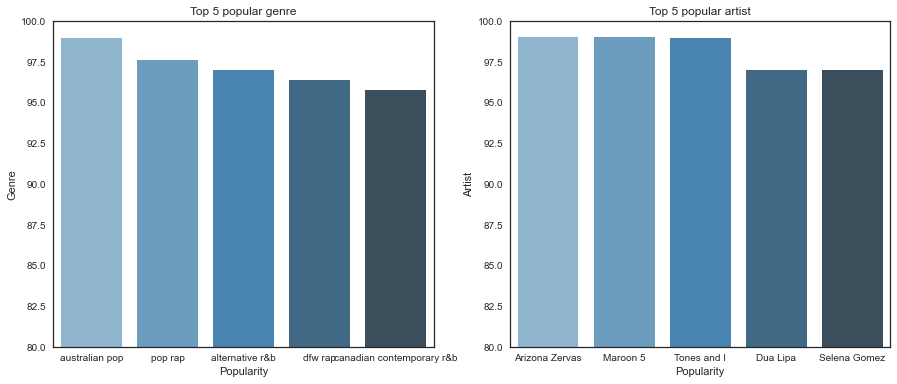

In [40]:
#4 Popularity by top genre 
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,6))
s1 = data.groupby(by = ['top genre']).mean()
top_5 = s1.nlargest(5,'pop')
sns.barplot(x = top_5.index, y = 'pop', data = top_5, ax = ax1, palette="Blues_d")
ax1.set_title('Top 5 popular genre')
ax1.set_xlabel('Popularity')
ax1.set_ylabel('Genre')
ax1.set(ylim=(80, 100))

#5 Popularity by artist
s2 = data.groupby(by = ['artist']).mean()
top_5 = s2.nlargest(5,'pop')
sns.barplot(x = top_5.index, y = 'pop', data = top_5, ax = ax2, palette="Blues_d")
ax2.set_title('Top 5 popular artist')
ax2.set_xlabel('Popularity')
ax2.set_ylabel('Artist')
ax2.set(ylim=(80, 100))

# 3.2 Methodology 

For Question 3, we will use k-means to cluster. To determine the number of clusters, we will use the elbow method and calinski_harabasz score to develop models. Finally we will explore the unique features of these clusters.


For Question 4, we will use Naive Bayes for classification and k-means for clustering. To determine important features in certain countries, we will use Principal Component Analysis and Feature Selection to discover country-wise features.



## 3.3 Models for Question 3: Is there a better cluster way to capture the features of the music?

### 3.3.1. Reading and cleaning datasets

In [41]:
df = pd.read_csv('top50contry.csv',index_col= 0,encoding = 'iso-8859-1')

The same songs may appear in different countries, so we need to drop the duplicates.

In [42]:
# Data Cleaning
data_detail = df.dropna() # Drop Column with null
data= data_detail.drop(['added','country'], axis = 1) # Column 'added' has only one distinct value. 
data = data.drop_duplicates() # The same songs may appear in different countries, so we need to drop the duplicates.
data.reset_index(drop= True, inplace= True)

There are 524 unique songs in the dataset.

### 3.3.2 Let's see what the current genre classification is

Text(0.5, 1.0, 'Histogram of current genres')

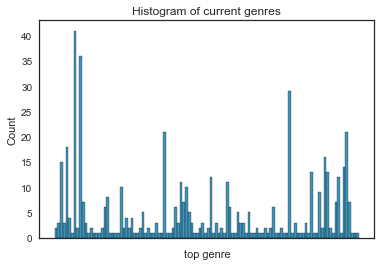

In [43]:
sns.histplot(data['top genre'])
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.title('Histogram of current genres')

In [44]:
data['top genre'].value_counts()[data['top genre'].value_counts()< 3]

cumbia chilena          2
forro                   2
r&b en espanol          2
contemporary country    2
basshall                2
                       ..
modern bollywood        1
trap argentino          1
brazilian edm           1
indonesian hip hop      1
italian pop             1
Name: top genre, Length: 66, dtype: int64

In [45]:
X = data[data.columns.difference(['country', 'title', 'artist','top genre'])]
silhouette_score(X, labels = data['top genre'])

-0.3843557721684957

There are 66 genres with less than 3 songs in it.This negative silhouette score means the songs in some genres are actually not that different from other genres becasue there are so many genres for the current number of features. Given that we only have 11 features, is there a better classification way to capture the features of the music?

### 3.3.3 PCA 

Before moving on to clustering, we will first get to know a little more about the features. We are going to examine the covariance between the features.

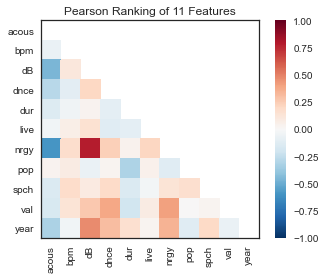

<AxesSubplot:title={'center':'Pearson Ranking of 11 Features'}>

In [46]:
from yellowbrick.features import Rank2D
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

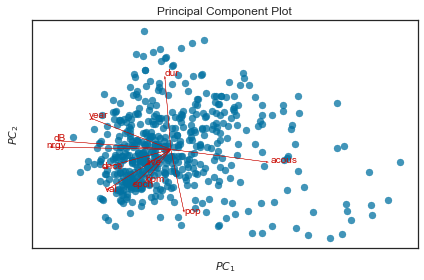

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [47]:
# PCA
from yellowbrick.features import PCA

visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(X)
visualizer.show()

From PCA analysis we can see that In PC2, dB, dancibility and energy are highly positively related and negatively related with acoustic.
In PC1, duration and popularity contribute to the total variance in another direction. It is useful for visulization.

### 3.3.4 Clustering

#### a. Choosing k, evaluating and choosing models

Use kmeans clustering to find genres 

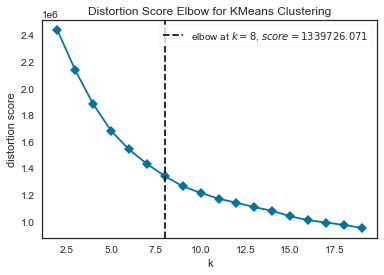

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
# Create an kmeans model object
model = KMeans(random_state=1, max_iter= 10000)

# run from k=2 to k=20
visualizer = KElbowVisualizer(model, k=(2,20), timings = False)
visualizer.fit(X)
visualizer.show()

The best k for distortion metric is 8.

Use Calinski Harabasz method to determine number of clusters

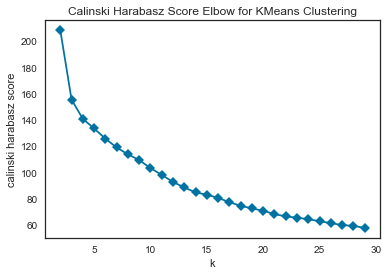

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [49]:
visualizer = KElbowVisualizer(model, k=(2,30), metric='calinski_harabasz',locate_elbow=False, timings=False)
visualizer.fit(X)
visualizer.show()

The best k for Calinski Harabasz is 2, different from distorion.
Since C-H score computes the ratio between the within-cluster dispersion and the between-cluster dispersion, when clustering is 2, it must be the case that there some really distinctive features between the two classes. 
We are going to look into both of the models with k = 8 and k = 2.

dict_keys(['ax', 'colors', 'estimator', 'is_fitted']) 


dict_keys(['ax', 'colors', 'estimator', 'is_fitted']) 




SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=10000, n_clusters=2,
                                      random_state=1))

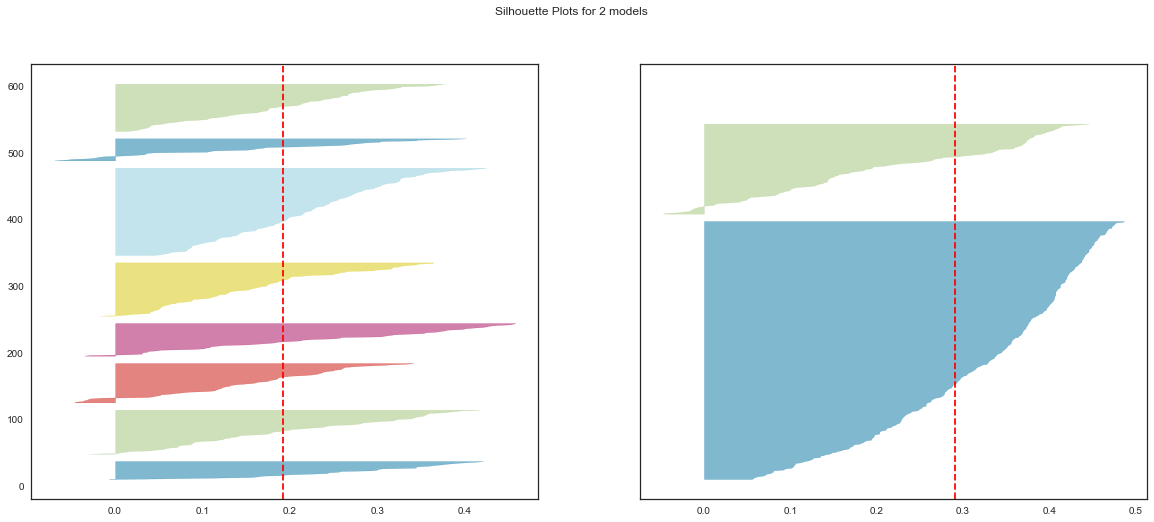

In [50]:
model_8 = KMeans(random_state=1, n_clusters=8, max_iter= 10000).fit(X)
model_2 = KMeans(random_state=1, n_clusters=2, max_iter= 10000).fit(X)

fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
fig.suptitle('Silhouette Plots for 2 models')

visualizer = SilhouetteVisualizer(model_8, colors='yellowbrick', ax = axes[0])
visualizer.fit(X)    

visualizer = SilhouetteVisualizer(model_2, colors='yellowbrick', ax = axes[1])
visualizer.fit(X) 
  

The silhouette values for k = 2 is better than k = 8.

dict_keys(['ax', 'embedding', 'estimator', 'is_fitted', 'legend', 'legend_loc', 'legend_size', 'max_size', 'min_size', 'random_state', 'scoring']) 


dict_keys(['ax', 'embedding', 'estimator', 'is_fitted', 'legend', 'legend_loc', 'legend_size', 'max_size', 'min_size', 'random_state', 'scoring']) 




InterclusterDistance(ax=<AxesSubplot:>,
                     estimator=KMeans(max_iter=10000, random_state=1))

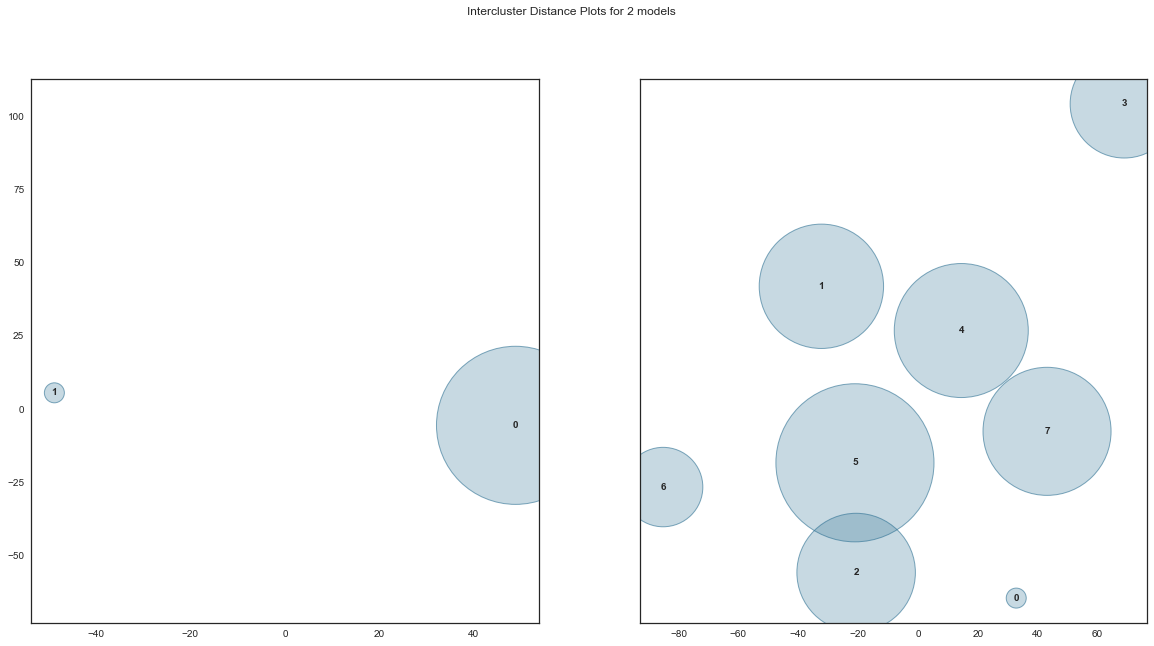

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
fig.suptitle('Intercluster Distance Plots for 2 models')

visualizer = InterclusterDistance(model_2, ax = axes[0])
visualizer.fit(X) 

visualizer = InterclusterDistance(model_8, ax = axes[1])
visualizer.fit(X) 

There is overlapping among 3 clusters out of 9, which is acceptable.

#### b. Insights from model with k = 2

In [52]:
X_2 = X.copy()
X_2['cluster'] = model_2.labels_

Use Mann-Whitney U Tests to examine whether the distribution of features are different between the clusters; t-test for mean

In [53]:
data0 = X_2[X_2['cluster']==0]
data1 = X_2[X_2['cluster']==1]

from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

print('{:10s}| {:20s}| {:10s}'.format('Feature', 'Mann-Whitney p-value','t-test p-value'))
for feature in X.columns[:-1]: # not interested in year
    x = data0[feature]
    y = data1[feature]
    print('{:10s}| {:20.4f}| {:10.4f}'.format(feature, mannwhitneyu(x,y)[1],ttest_ind(x,y)[1]))

Feature   | Mann-Whitney p-value| t-test p-value
acous     |               0.1026|     0.2718
bpm       |               0.2386|     0.5075
dB        |               0.2223|     0.5853
dnce      |               0.0000|     0.0000
dur       |               0.0000|     0.0000
live      |               0.0639|     0.0446
nrgy      |               0.1137|     0.3087
pop       |               0.0000|     0.0000
spch      |               0.0000|     0.0022
val       |               0.0000|     0.0000


When k = 2 clusters, there is significancy difference in dancibility, duration,popularity, speechiness, and valence. Examine the distribution of these features in different clusters.

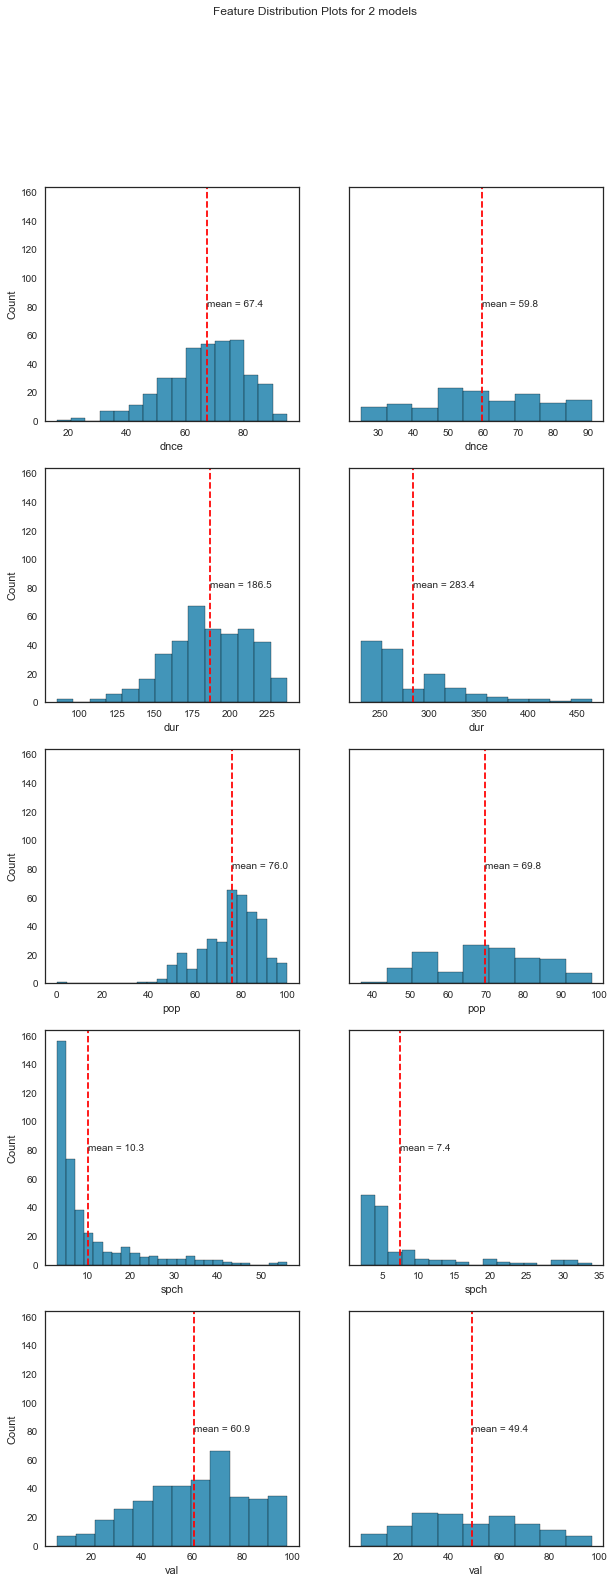

In [54]:
features_for_plot = ['dnce', 'dur', 'pop', 'spch', 'val']
features_for_table = ['cluster', 'dnce', 'dur', 'pop', 'spch', 'val']
cluster_df = pd.DataFrame(columns=(features_for_table))
for i in [0,1]:
    cluster_df.loc[i,'cluster'] = i

fig, axes = plt.subplots(5, 2, figsize=(10, 25), sharey=True)
fig.suptitle('Feature Distribution Plots for 2 models')

for i in range(0,5):
    feature = features_for_plot[i]
    mean0 = data0[feature].mean()
    mean1 = data1[feature].mean()
    
    sns.histplot(ax=axes[i,0], x = feature,data = data0)
    axes[i,0].axvline(x=mean0, color='red', linestyle='--')
    axes[i,0].text(mean0, 80, 'mean = {:.1f}'.format(mean0))
    cluster_df.loc[0,feature] = mean0
    
    sns.histplot(ax=axes[i,1], x = feature,data = data1)
    axes[i,1].axvline(mean1, color='red', linestyle='--')
    axes[i,1].text(mean1, 80, 'mean = {:.1f}'.format(mean1))
    cluster_df.loc[1,feature] = mean1

In [55]:
cluster_df

,cluster,dnce,dur,pop,spch,val
0,0,67.399485,186.53866,76.015464,10.270619,60.865979
1,1,59.764706,283.375,69.757353,7.433824,49.441176


##### Conclusion:  When there are 2 clusters, Cluster 0 has higher danceability, shorter duration, more speechiness, and more valence. The top 10 popular song in this cluster are as follows.

In [56]:
data.iloc[data0.sort_values('pop', ascending=False)[:9].index]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,Dance Monkey,Tones and I,australian pop,2019,98.0,59.0,82.0,-6.0,15.0,51.0,209,69.0,9.0,100
2,Memories,Maroon 5,pop,2019,91.0,32.0,76.0,-7.0,8.0,57.0,189,84.0,5.0,99
3,Circles,Post Malone,dfw rap,2019,120.0,76.0,70.0,-3.0,9.0,55.0,215,19.0,4.0,99
1,ROXANNE,Arizona Zervas,pop rap,2019,117.0,60.0,62.0,-6.0,46.0,46.0,164,5.0,15.0,99
366,Lose You To Love Me,Selena Gomez,dance pop,2019,102.0,34.0,51.0,-9.0,21.0,9.0,206,58.0,4.0,97
6,Falling,Trevor Daniel,alternative r&b,2018,127.0,43.0,78.0,-9.0,9.0,24.0,159,12.0,4.0,97
7,RITMO (Bad Boys For Life),The Black Eyed Peas,dance pop,2019,105.0,72.0,72.0,-7.0,24.0,67.0,222,3.0,7.0,97
8,Don't Start Now,Dua Lipa,dance pop,2019,124.0,79.0,79.0,-5.0,10.0,68.0,183,1.0,8.0,97
123,bad guy,Billie Eilish,electropop,2019,135.0,43.0,70.0,-11.0,10.0,56.0,194,33.0,38.0,96


##### Conclusion: Cluster 1 has lower danceability, longer duration, less speechiness, and less valence. The top 10 popular song in this cluster are as follows.

In [57]:
data.iloc[data1.sort_values('pop', ascending=False)[:9].index]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
4,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,150.0,63.0,34.0,-7.0,7.0,35.0,241,16.0,4.0,98
5,everything i wanted,Billie Eilish,electropop,2019,120.0,23.0,70.0,-14.0,11.0,24.0,245,90.0,10.0,98
62,China,Anuel AA,latin,2019,105.0,81.0,79.0,-4.0,8.0,61.0,302,8.0,9.0,94
367,Lucid Dreams,Juice WRLD,chicago rap,2018,84.0,57.0,51.0,-7.0,34.0,22.0,240,35.0,20.0,94
65,LA CANCIÓN,J Balvin,latin,2019,176.0,65.0,75.0,-6.0,11.0,43.0,243,15.0,32.0,93
67,Callaita,Bad Bunny,latin,2019,176.0,62.0,61.0,-5.0,24.0,24.0,251,60.0,31.0,92
66,Adicto (with Anuel AA & Ozuna),Tainy,pop reggaeton,2019,80.0,84.0,73.0,-5.0,18.0,62.0,271,2.0,7.0,92
370,Mean It,Lauv,pop,2019,96.0,45.0,75.0,-9.0,17.0,34.0,233,4.0,9.0,89
76,Hola - Remix,Dalex,latin,2019,182.0,67.0,65.0,-6.0,8.0,34.0,250,47.0,31.0,89


#### c. Insights from model with k = 2

In [58]:
cluster_df

,cluster,dnce,dur,pop,spch,val
0,0,67.399485,186.53866,76.015464,10.270619,60.865979
1,1,59.764706,283.375,69.757353,7.433824,49.441176


##### Conclusion:  When there are 2 clusters, Cluster 0 has higher danceability, shorter duration, more speechiness, and more valence. The top 10 popular song in this cluster are as follows.

In [59]:
data.iloc[data0.sort_values('pop', ascending=False)[:9].index]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,Dance Monkey,Tones and I,australian pop,2019,98.0,59.0,82.0,-6.0,15.0,51.0,209,69.0,9.0,100
2,Memories,Maroon 5,pop,2019,91.0,32.0,76.0,-7.0,8.0,57.0,189,84.0,5.0,99
3,Circles,Post Malone,dfw rap,2019,120.0,76.0,70.0,-3.0,9.0,55.0,215,19.0,4.0,99
1,ROXANNE,Arizona Zervas,pop rap,2019,117.0,60.0,62.0,-6.0,46.0,46.0,164,5.0,15.0,99
366,Lose You To Love Me,Selena Gomez,dance pop,2019,102.0,34.0,51.0,-9.0,21.0,9.0,206,58.0,4.0,97
6,Falling,Trevor Daniel,alternative r&b,2018,127.0,43.0,78.0,-9.0,9.0,24.0,159,12.0,4.0,97
7,RITMO (Bad Boys For Life),The Black Eyed Peas,dance pop,2019,105.0,72.0,72.0,-7.0,24.0,67.0,222,3.0,7.0,97
8,Don't Start Now,Dua Lipa,dance pop,2019,124.0,79.0,79.0,-5.0,10.0,68.0,183,1.0,8.0,97
123,bad guy,Billie Eilish,electropop,2019,135.0,43.0,70.0,-11.0,10.0,56.0,194,33.0,38.0,96


##### Conclusion: Cluster 1 has lower danceability, longer duration, less speechiness, and less valence. The top 10 popular song in this cluster are as follows.

In [60]:
data.iloc[data1.sort_values('pop', ascending=False)[:9].index]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
4,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,150.0,63.0,34.0,-7.0,7.0,35.0,241,16.0,4.0,98
5,everything i wanted,Billie Eilish,electropop,2019,120.0,23.0,70.0,-14.0,11.0,24.0,245,90.0,10.0,98
62,China,Anuel AA,latin,2019,105.0,81.0,79.0,-4.0,8.0,61.0,302,8.0,9.0,94
367,Lucid Dreams,Juice WRLD,chicago rap,2018,84.0,57.0,51.0,-7.0,34.0,22.0,240,35.0,20.0,94
65,LA CANCIÓN,J Balvin,latin,2019,176.0,65.0,75.0,-6.0,11.0,43.0,243,15.0,32.0,93
67,Callaita,Bad Bunny,latin,2019,176.0,62.0,61.0,-5.0,24.0,24.0,251,60.0,31.0,92
66,Adicto (with Anuel AA & Ozuna),Tainy,pop reggaeton,2019,80.0,84.0,73.0,-5.0,18.0,62.0,271,2.0,7.0,92
370,Mean It,Lauv,pop,2019,96.0,45.0,75.0,-9.0,17.0,34.0,233,4.0,9.0,89
76,Hola - Remix,Dalex,latin,2019,182.0,67.0,65.0,-6.0,8.0,34.0,250,47.0,31.0,89


#### d. Insights from model with k = 8

In [61]:
X_8 = X.copy()
X_8['cluster'] = model_8.labels_

data0 = X_8[X_8['cluster']==0]
data1 = X_8[X_8['cluster']==1]
data2 = X_8[X_8['cluster']==2]
data3 = X_8[X_8['cluster']==3]
data4 = X_8[X_8['cluster']==4]
data5 = X_8[X_8['cluster']==5]
data6 = X_8[X_8['cluster']==6]
data7 = X_8[X_8['cluster']==7]

Use  Kruskal-Wallis H-test to examine whether the distribution of features are different among the clusters 

In [62]:
from scipy.stats import kruskal

print('{:10s}| {:20s}'.format('Feature', 'Kruskal-Wallis p-value'))
for feature in X.columns[:-1]: # not interested in year
    x0 = data0[feature]
    x1 = data1[feature]
    x2 = data2[feature]
    x3 = data3[feature]
    x4 = data4[feature]
    x5 = data5[feature]
    x6 = data6[feature]
    x7 = data7[feature]
    print('{:10s}| {:20.4f}'.format(feature, kruskal(x0,x1,x2,x3,x4,x5,x6,x7)[1]))

Feature   | Kruskal-Wallis p-value
acous     |               0.0000
bpm       |               0.0000
dB        |               0.0000
dnce      |               0.0000
dur       |               0.0000
live      |               0.0000
nrgy      |               0.0000
pop       |               0.0000
spch      |               0.0000
val       |               0.0000


All features are significant for at least one cluster from other clusters.Since there are so many features and 36 combinations of clusters in all, it is not reasonable to examine every feature for every combination of 2 clusters. Therefore, we will look in to combinations of features based on the correlation revealed in feature analysis above.

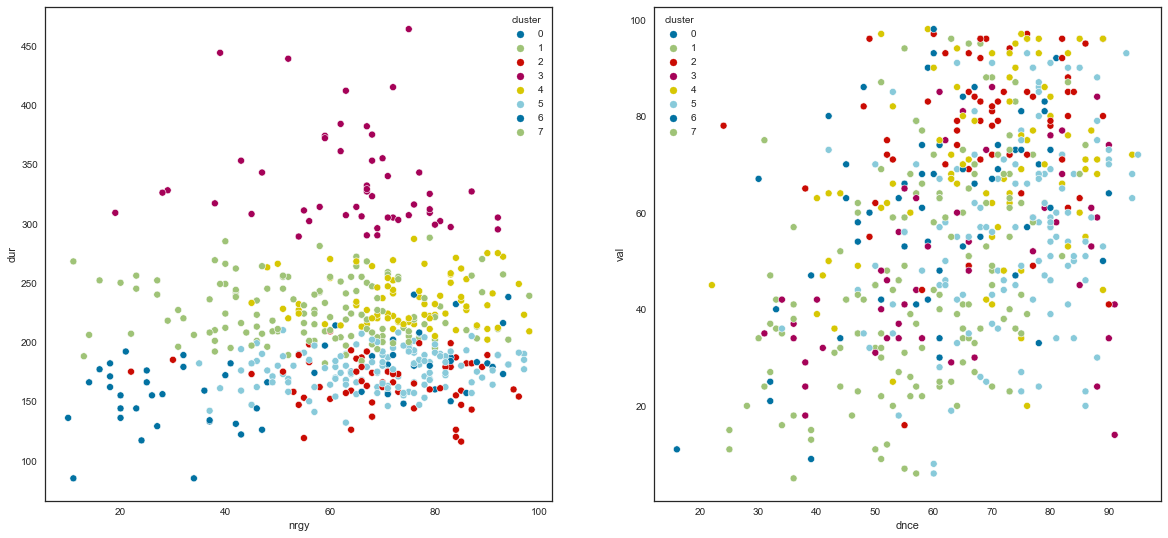

In [63]:
plt.figure(figsize=(20,20))
plt.subplot(221)
ax = plt.gca()
sns.scatterplot(ax=ax, x = 'nrgy', y = 'dur', data = X_8, hue = 'cluster', palette = sns.color_palette(n_colors=8))
plt.axis('tight')

plt.subplot(222)
ax = plt.gca()
sns.scatterplot(ax=ax, x = 'dnce', y = 'val', data = X_8, hue = 'cluster', palette = sns.color_palette(n_colors=8))
plt.axis('tight')
plt.show()

The purple cluster has high energy, medium duration, more danceability and more valence.  
The yellow cluster has lower energy, medium duration, less danceablity and less valence.
The deep blue and the shallow blue has shorter duration for less than 3 minutes, and the deep blue one is slightly more gentle than the shallow one.(more valence, less danceablity)

## 3.4 Model for Question 4：Are there any country-specific music preferences?

In [64]:
#Data Cleaning
df = pd.read_csv('top50contry.csv',index_col= 0,encoding = 'iso-8859-1')
data = df.dropna() #Drop Column with null
data = data.drop('added', axis = 1) #Column 'added' has only one distinct value. 
data.reset_index(drop= True, inplace= True)
data.head(5)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,country
0,Dance Monkey,Tones and I,australian pop,2019,98.0,59.0,82.0,-6.0,15.0,51.0,209,69.0,9.0,100,world
1,ROXANNE,Arizona Zervas,pop rap,2019,117.0,60.0,62.0,-6.0,46.0,46.0,164,5.0,15.0,99,world
2,Memories,Maroon 5,pop,2019,91.0,32.0,76.0,-7.0,8.0,57.0,189,84.0,5.0,99,world
3,Circles,Post Malone,dfw rap,2019,120.0,76.0,70.0,-3.0,9.0,55.0,215,19.0,4.0,99,world
4,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,150.0,63.0,34.0,-7.0,7.0,35.0,241,16.0,4.0,98,world


### An inituitive idea would be classification based on countries. However, classification with countries comes with a poor accuracy.

In [65]:
#Classification by country
X = data[data['country'] != 'world'].drop(['title', 'artist','top genre', 'country','year'], axis = 1)
y = data[data['country'] != 'world']['country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

#Naive Bayes classifier 
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
#print the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      africa       0.11      0.08      0.09        13
   argentina       0.17      0.29      0.22        17
   australia       0.20      0.20      0.20        15
     belgium       0.00      0.00      0.00        14
     bolivia       0.08      0.14      0.10        14
      brazil       0.50      0.83      0.62        12
      canada       0.08      0.20      0.11        15
       chile       0.50      0.08      0.14        12
    colombia       0.25      0.42      0.31        12
      france       0.33      0.23      0.27        13
     germany       0.00      0.00      0.00        12
       india       0.30      0.19      0.23        16
   indonesia       0.24      0.36      0.29        14
      israel       0.75      0.29      0.41        21
       italy       0.00      0.00      0.00        13
       japan       0.55      0.63      0.59        19
     malasya       0.16      0.27      0.20        15
       spain       0.12    

#### The result showed a relatively low accuracy. However, we may find some countries with a high precision: Brazil, Israel, Chile and Japan. 

#### A possible reason is that there are too many classification categories in the result. Since accuracy is defined as TP+TN/TP+FP+FN+TN, a large denominator would lead to a low accuracy. On the other hand, precision is defnied as TP/TP+FP. Therfore, it might be possible for some countries to have a low precision.

### Let's choose the countries with high precision to do the classification again. We select Brazil, Israel and Japan and use Naive Bayes to conduct the classification

              precision    recall  f1-score   support

      brazil       0.87      0.93      0.90        14
      israel       0.86      0.67      0.75        18
       japan       0.75      0.92      0.83        13

    accuracy                           0.82        45
   macro avg       0.82      0.84      0.82        45
weighted avg       0.83      0.82      0.82        45



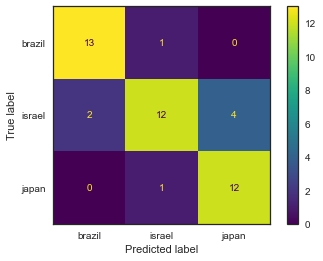

In [66]:
#Only select three countries: Japan, chile and columbia
data1 = data[(data["country"] == 'japan') | (data["country"] == 'israel')| (data["country"] == 'brazil')]
#Classification by country
X1 = data1.drop(['title', 'artist','top genre', 'country','year'], axis = 1)
y1 = data1['country']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state = 1)
#KNN classifier
neigh = GaussianNB()
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)
#precision
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()
print(classification_report(y_test, y_predict))

#### The accuracy has increased largely based on the new dataset!

### We could do a clustering to verify our choice. 

### First, group the orginal dataset by countries and calculate the mean of each property. Therefore we could know what a popular song in certain countries looks like.

In [67]:
# Dataset Rebuilding
data_clu = data[data['country'] != 'world'].drop(['title', 'artist','top genre','pop','year'], axis = 1)
data_clu.head(5)

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,country
49,98.0,59.0,82.0,-6.0,15.0,51.0,209,69.0,9.0,africa
50,120.0,76.0,70.0,-3.0,9.0,55.0,215,19.0,4.0,africa
51,91.0,32.0,76.0,-7.0,8.0,57.0,189,84.0,5.0,africa
52,117.0,60.0,62.0,-6.0,46.0,46.0,164,5.0,15.0,africa
53,150.0,63.0,34.0,-7.0,7.0,35.0,241,16.0,4.0,africa


In [68]:
# Groupby
data_gb = data_clu.groupby(by = 'country').mean()
data_gb.head(5)

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
country,,,,,,,,,
africa,120.312500,53.979167,62.750000,-9.125000,18.250000,60.187500,227.291667,40.479167,5.583333
argentina,123.775510,73.591837,73.551020,-4.367347,17.693878,68.530612,224.183673,20.612245,11.346939
australia,122.469388,54.816327,56.877551,-8.428571,19.244898,63.530612,187.877551,44.551020,5.061224
belgium,125.755102,55.653061,58.326531,-8.367347,21.571429,62.897959,190.102041,44.204082,5.714286
bolivia,128.897959,69.040816,73.408163,-4.836735,14.795918,68.183673,226.673469,22.836735,14.836735


### Then we do a KMeans clustering for countries based on songs' properties. Since we select three typical countries above, let's set n_cluster = 3 to see the result.

In [69]:
model_tuned = KMeans(random_state=1, n_clusters=3).fit(data_gb)
country_clu = pd.DataFrame(data = model_tuned.labels_, columns = ['Clustering'], index = data_gb.index)
print(country_clu[country_clu['Clustering'] == 0].T)
print(country_clu[country_clu['Clustering'] == 1].T)
print(country_clu[country_clu['Clustering'] == 2].T)

country     africa  india  indonesia  israel  malasya
Clustering       0      0          0       0        0
country     argentina  bolivia  chile  colombia  japan  spain
Clustering          1        1      1         1      1      1
country     australia  belgium  brazil  canada  france  germany  italy  usa
Clustering          2        2       2       2       2        2      2    2


#### As we can see, Israel, Japan and Brazil are in three different clusters. Each represents a unique clustering. Therefore, we could focus on these three countries to discover countrywise features.

### We take two approach to discover countrywise features: PCA and Feature Selection.  

For PCA we select two principal components and visualize their loadings. 

For feature selection we use linear regression model and forward sequential selection. Let's start with Japan. 

### PCA and Feature Selection for popular songs in Japan

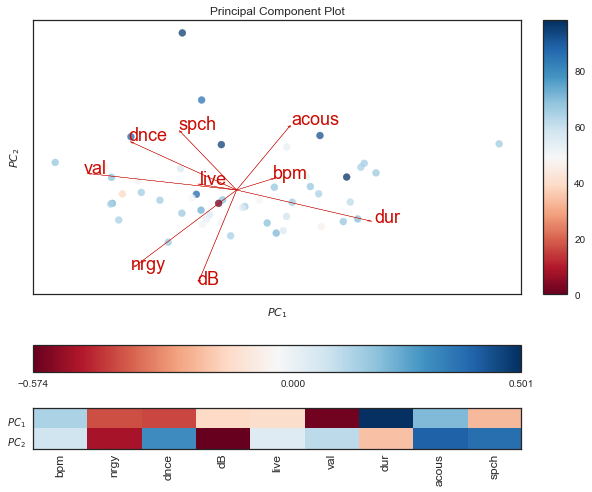

Features selected by forward sequential selection for Japan: ['nrgy' 'val' 'spch']


In [70]:
#Look into Japan by PCA
from yellowbrick.features import PCA
data_PCA = data[data["country"] == 'japan']
X2 = data_PCA.drop(['title', 'artist','top genre','country','pop', 'year'], axis = 1)
y2 = data_PCA['pop']

visualizer = PCA(scale=True, proj_features=True, size=(600, 500), heatmap = True)
visualizer.fit_transform(X2,y2)
for label in visualizer.ax.texts:
    label.set_size(18)
visualizer.show()

from sklearn.feature_selection import SequentialFeatureSelector
model= LinearRegression()
features_selected = 3
k = 10
sfs = SequentialFeatureSelector(model, 
                               n_features_to_select = features_selected, 
                               direction="forward",
                               scoring='neg_mean_squared_error',
                               cv= k) 
sfs = sfs.fit(X2,y2)
feature_names= X2.columns.values
print("Features selected by forward sequential selection for Japan: "+str(feature_names[sfs.get_support()]))

#### In these results, first principal component has large positive associations with val and dur, so this component primarily measures emotional-related characterstics. The second component has large positive associations with dB and energy, so this component primarily measures the loudness of a song. 

#### As for the feature selection, it selects energy, val and spch, which validates the result of PCA. To sum up, if you want to create a popular song in Japan, focus on its emotional appeal and loudness. 

### PCA and Feature Selection for popular songs in Israel.

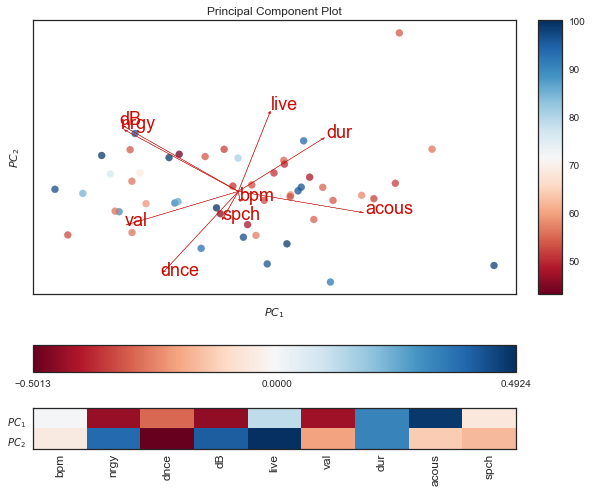

Features selected by forward sequential selection for Israel: ['nrgy' 'dur' 'spch']


In [71]:
#Look into israel by PCA
from yellowbrick.features import PCA
data_PCA = data[data["country"] == 'israel']
X2 = data_PCA.drop(['title', 'artist','top genre','country','pop', 'year'], axis = 1)
y2 = data_PCA['pop']

visualizer = PCA(scale=True, proj_features=True, size=(600, 500), heatmap = True)
visualizer.fit_transform(X2, y2)
for label in visualizer.ax.texts:
    label.set_size(18)
visualizer.show()

from sklearn.feature_selection import SequentialFeatureSelector
model= LinearRegression()
features_selected = 3
k = 10
sfs = SequentialFeatureSelector(model, 
                               n_features_to_select = features_selected, 
                               direction="forward",
                               scoring='neg_mean_squared_error',
                               cv= k) 
sfs = sfs.fit(X2,y2)
feature_names= X2.columns.values
print("Features selected by forward sequential selection for Israel: "+str(feature_names[sfs.get_support()]))

#### In these results, first principal component has large associations with nrgy, val, dB and acous, so this component primarily measures the loudness characteristics. The second component has large positive associations with dnce and live, so this component primarily concerns about danceability. 

#### As for the feature selection, it selects energy, dur and spch, which is different from the result of PCA. One thing is for sure:  if you want to create a popular song in Israel, pay extra attention to the energy aspect of a song.

### PCA and Feature Selection for popular songs in Brazil

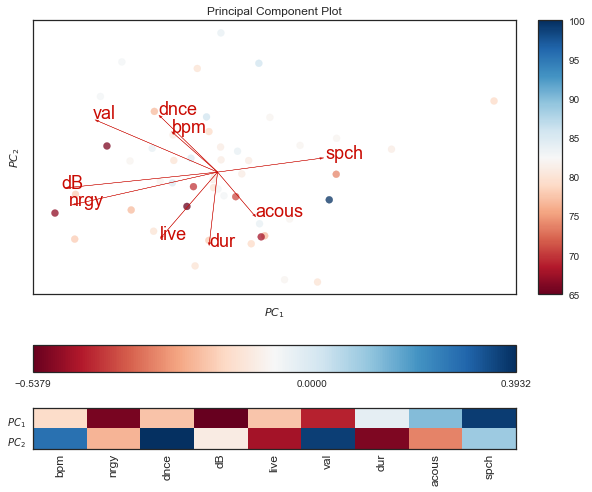

Features selected by forward sequential selection for Brazil: ['nrgy' 'dnce' 'live']


In [72]:
#Look into brazil by PCA
from yellowbrick.features import PCA
data_PCA = data[data["country"] == 'brazil']
X2 = data_PCA.drop(['title', 'artist','top genre','country','pop', 'year'], axis = 1)
y2 = data_PCA['pop']

visualizer = PCA(scale=True, proj_features=True, size=(600, 500), heatmap = True)
visualizer.fit_transform(X2, y2)
for label in visualizer.ax.texts:
    label.set_size(18)
visualizer.show()

from sklearn.feature_selection import SequentialFeatureSelector
model= LinearRegression()
features_selected = 3
k = 10
sfs = SequentialFeatureSelector(model, 
                               n_features_to_select = features_selected, 
                               direction="forward",
                               scoring='neg_mean_squared_error',
                               cv= k) 
sfs = sfs.fit(X2,y2)
feature_names= X2.columns.values
print("Features selected by forward sequential selection for Brazil: "+str(feature_names[sfs.get_support()]))


#### In these results, first principal component has large associations with nrgy, val,  dB and acous, so this component primarily measures the loudness characteristics(which is quite similar to PC1 for israel). The second component has large positive associations with dur and live, so this component primarily concerns about the pace of a song. 

#### As for the feature selection, it selects energy, dnce and live, which is different from the result of PCA. For Brazilian songs, liveliness is definitely a critical feature. Energy is also something you need to consider. 

## Key Takeaway From This Question

### Question 3:
When there are 2 clusters, Cluster 1(emotional) has lower danceability, longer duration, less speechiness, and less valence including songs like Mariah Carey’s All I Want for ChristmasIs You and Billie Eilish’s everything i wanted. Cluster 2 (energetic) has higher danceability, shorter duration, more speechiness, and more valence including Billie Eilish’s bad guy  
 
When there are 9 clusters, The red cluster has high energy, medium duration, more danceability and more valence.
The yellow cluster has lower energy, medium duration, less danceablity and less valence. The blue and the green has shorter duration for less than 3 minutes, and the blue one is slightly more gentle than the green one.(more valence, less danceablity)

### Question 4:
There are countrywise feature preferences. We could select three typical countries as examples. 
Japan represents countries where valence and loudness greatly affect the popularity of songs. 
Israel represents countries where energy greatly affects the popularity of songs. 
Brazil represents countries where energy and liveliness greatly affect the popularity of songs. 
For all countries, a song's energy is always crucial in deciding the popularity.

# Part 4: Conclusions and Discussions Addressing Questions

#### Question 1: What songs can make it to the top 10 on the billboard?
1119 songs hit the Billboard Top10 Songs over a period of 20 years.
#### Question 2: Which artists could create songs that reached the billboard?
The singer with most number of songs that made it to the Top10 is Matchbox Twenty
#### Question 3: Is there a better cluster way to capture the features of the music?
We could set two-cluster method or nine-cluster method. With 2 cluster method, one is emotional and another is energetic. 
#### Question 4：Are there any country-specific music preferences?
There are country-specific preferences. Three typical countries are Japan, Israel and Brazil. Each represents a feature preference.

# Part 5: Future work

## Future work 1:

The clustering methods this project is proposing is based on the features we have. Currently, this dataset only contains a limited number of features. If we have a larger dataset with more features, we will be able to make more delicate clustering, bring new insights into what different genre of music actually mean to people other than the tradition genre method such as hip pop and R&B.


## Future work 2

In Question 4, we use Feature Selection and Pricipal Component Analysis to decide what features are important in different countries. However, the result of SFS and PCA does not always correspond with each other. An important future work would be to discover the reason behind it and try other methods for feature imporance. 

# Thank you!

# References
The project has also used the Homework and Lab code solutions that have been uploaded by the professor. 

https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
https://stackoverflow.com/questions/58270129/convert-categorical-data-into-numerical-data-in-python
https://imbalanced-learn.org/stable/
https://imbalanced-learn.org/stable/auto_examples/applications/plot_multi_class_under_sampling.html#sphx-glr-auto-examples-applications-plot-multi-class-under-sampling-py
https://imbalanced-learn.org/stable/user_guide.html#user-guide
https://stackoverflow.com/questions/63864667/how-to-use-dictionary-in-smote-algorithm-for-resampling-the-multi-class-input-da
https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/introduction.html  
https://www.statsmodels.org/stable/examples/notebooks/generated/discrete_choice_overview.html https://blog.csdn.net/u010665216/article/details/78559091  
https://blog.csdn.net/dta0502/article/details/82988193  
https://www.delftstack.com/zh/howto/matplotlib/how-to-hide-axis-text-ticks-and-or-tick-labels-in-matplotlib/  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html  
https://www.scikit-yb.org/en/latest/api/features/index.html  
https://zhuanlan.zhihu.com/p/351075744  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://stats.stackexchange.com/questions/183236/what-is-the-relation-between-k-means-clustering-and-pca
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html
https://dburkhardt.github.io/tutorial/visualizing_pca/
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
https://machinelearningmastery.com/principal-component-analysis-for-visualization/
https://www.scikit-yb.org/en/latest/api/features/pca.html
https://www.scikit-yb.org/en/latest/api/index.html
https://www.scikit-yb.org/en/latest/
